# Force-controlled loading of a poroelastic material

This notebook will cover:

* Force-controlled experiments
* Looping over model options

In [1]:
import ucompress as uc
import matplotlib.pyplot as plt

To start, the parameter values and the model must be defined.  These are taken to be from the pre-defined`NeoHookean` parameter set 

## Setting up the problem

Setting up and simulating a force-controlled unconfined compression experiment follows the same flow as for displacement-controlled experiments.  We first define the material, which is a neo-Hookean poroelastic material with constant permeability

In [18]:
# Define the parameters
pars = uc.parameters.example_parameters.NeoHookean()

# Define the mechanics (stress-strain law)
mech = uc.mechanics.NeoHookean()

# Define the permeability
perm = uc.permeability.Constant()

# Build the model
model = uc.base_models.Poroelastic(
    mechanics = mech,
    permeability = perm,
    parameters = pars)

When solving force-controlled problems, the value of the axial stretch $\lambda_z$ in the parameters acts as the initial guess for the solver.  

In [19]:
print(pars)

Dimensional parameter values
---------------------------------------
R = 5.00e-03
E_m = 5.00e+04
nu_m = 0.00e+00
k_0 = 2.00e-13
phi_0 = 8.00e-01
lam_z = 5.00e-01
beta_r = 1.00e+00
beta_z = 1.00e+00
F = -1.00e+00
t_start = 1.00e-01
t_end = 1.00e+04

Computational parameter values
-----------------------------------------
N = 40
Nt = 200
t_spacing = log



Thus, the initial guess for the axial stretch is $\lambda_z = 0.5$.

The `ForceControlled` class from the `experiments` module is used to create a force-controlled experiment.

In [20]:
problem = uc.experiments.ForceControlled(model, pars)

### Computing the instantaneous and equilibrium responses

First, the initial (also called instantaneous) and equilibrium responses can be computed using the `initial_response` and `steady_response` methods

In [21]:
# compute the initial response
sol_instant = problem.initial_response()

# print the force to the screen
print(f'Initial axial stretch is {sol_instant.lam_z:.2f}')

# compute the steady (equilibrium) response
sol_steady = problem.steady_response()

# print the force to the screen
print(f'Equilibrium axial stretch is {sol_steady.lam_z:.2f}')

Initial axial stretch is 0.86
Equilibrium axial stretch is 0.78


### Calculating the time-dependent response

The time-dependent response to compression can be calculated by calling the `transient_response` method.

In [8]:
sol = problem.transient_response()

--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 2.9


Having simulated the experiment, the force on the platten is plotted as a function of time.  We also plot the instantaneous and equilibrium forces too.

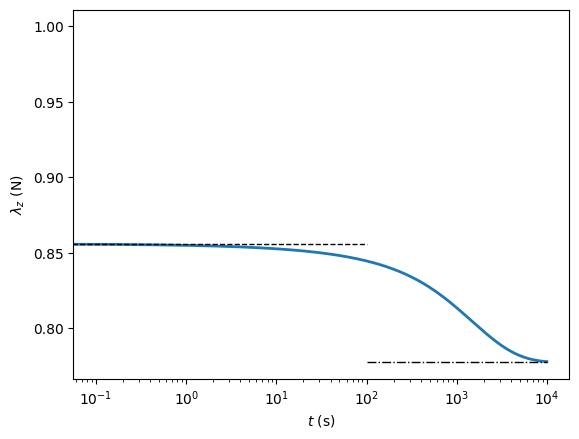

In [28]:
plt.semilogx(sol.t, sol.lam_z, lw = 2)
plt.hlines(sol_instant.lam_z, 1e-2, 1e2, lw = 1, color = 'k', linestyles='--')
plt.hlines(sol_steady.lam_z, 1e2, 1e4, lw = 1, color = 'k', linestyles='-.')
plt.xlabel('$t$ (s)')
plt.ylabel(r'$\lambda_z$ (N)')
plt.show()

## Exploring different permeability functions

One of the features of `ucompress` is that it's easy to explore different model options.  In this example, we'll explore how changing the permeability model affects the results.  There are three permeability functions that are defined in `ucompress`:
* Constant
* Kozeny-Carmen
* Holmes-Mow

To use the Holmes-Mow law, we must define two additional parameters, $a$ and $M$, which control how the permeability changes with deformation.  We can add these parameters as follows:

In [25]:
pars.physical["a"] = 1
pars.physical["M"] = 2

We now loop over the different permeability functions and plot the results

Solving with Constant permeability
--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 2.9
Solving with Kozeny-Carmen permeability
--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 3.0
Solving with Holmes-Mow permeability
--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 3.0


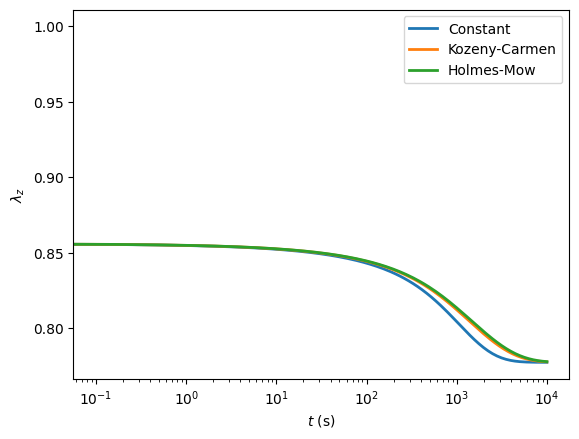

In [27]:
# Define the mermeabilities
permeabilities = [
    uc.permeability.Constant(),
    uc.permeability.KozenyCarman(),
    uc.permeability.HolmesMow()
]

# Labels
labels = ['Constant', 'Kozeny-Carmen', 'Holmes-Mow']

# Loop
for perm, l in zip(permeabilities, labels):

    print('=================================================')
    print(f'Solving with {l} permeability')

    # Build model
    model = uc.base_models.Poroelastic(
        mechanics = mech,
        permeability = perm,
        parameters = pars)

    # Set up experiment and solve
    experiment = uc.experiments.ForceControlled(model, pars)
    sol = experiment.transient_response()

    # Plot
    plt.semilogx(sol.t, 
                 sol.lam_z, 
                 lw = 2,
                 label = l
                )

plt.legend()
plt.xlabel('$t$ (s)')
plt.ylabel(r'$\lambda_z$')
plt.show()

Both the Kozeny-Karmen laws predict that the permeability decreases with deformation.  Thus, as fluid is removed from the system and the volume decreases, the permeability decreases, slowing the rate of poroelastic relaxation.